# K-Means Clustering Method from Kaggle

Source: https://www.kaggle.com/minc33/visualizing-high-dimensional-clusters/notebook

In [1]:
#Basic imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'
from sklearn import metrics #used for labeling

#plotly imports
import plotly as py
import chart_studio.plotly as cs
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Prep data

In [2]:
#read dummy df
X = pd.read_csv('trip_dummies_df.csv', index_col=0)

In [3]:
X.head()

trip_id  uniqueid  number_of_trips_taken  qtemphigh  qtemplow  \
0   3101674    101674                    3.0       79.0      58.0   
1  11202717  10202717                    3.0       66.0      51.0   
2  12202717  10202717                    3.0       66.0      51.0   
3  51200330  50200330                    4.0       73.0      57.0   
4  52200330  50200330                    4.0       73.0      57.0   

   qprecipitation     allwt  trip_id_count  qday_Friday  qday_Monday  \
0            0.00  2.269123              1            0            0   
1            0.25  0.868687              1            0            0   
2            0.25  0.868687              1            0            0   
3            0.00  2.433119              1            0            0   
4            0.00  2.433119              1            0            0   

   qday_Saturday  qday_Sunday  qday_Thursday  qday_Tuesday  qday_Wednesday  \
0              0            1              0             0               0   
1              1            0              0             0               0   
2              1            0              0             0               0   
3              0            0              1             0               0   
4              0            0              1             0               0   

   qday1typical_Don't know  qday1typical_Not at all typical  \
0                        0                                0   
1                        0                                0   
2                        0                                0   
3                        0                                0   
4                        0                                0   

   qday1typical_Not very typical  qday1typical_Refused  \
0                              0                     0   
1                              0                     0   
2                              0                     0   
3                              0                     0   
4                              0                     0   

   qday1typical_Somewhat typical  qday1typical_Very typical  \
0                              0                          1   
1                              0                          1   
2                              0                          1   
3                              0                          1   
4                              0                          1   

   qborough_home_Brooklyn  qborough_home_Manhattan  qborough_home_Queens  \
0                       0                        0                     1   
1                       0                        0                     1   
2                       0                        0                     1   
3                       0                        0                     1   
4                       0                        0                     1   

   qborough_home_Staten Island  qborough_home_The Bronx  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   qsurveyzone_home_Inner Brooklyn  qsurveyzone_home_Inner Queens  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   qsurveyzone_home_Manhattan Core  qsurveyzone_home_Middle Queens  \
0                                0                               1   
1                                0                               1   
2                                0                               1   
3                                0                               1   
4  

In [4]:
#scale numerical variables
numer = X[["number_of_trips_taken", "qtemphigh", "qtemplow", "qprecipitation"]]

In [5]:
IDs = X[["trip_id", "uniqueid"]]

In [6]:
IDs.tail()

trip_id  uniqueid
7972  62201178  50201178
7973  62202898  50202898
7974  63200525  50200525
7975  64200525  50200525
7976  65200525  50200525

In [7]:
#consider removing demographic variables unrelated to mobility, refused, don't know variables

categ = X[["trip_id", "uniqueid""qday_Friday","qday_Monday","qday_Saturday","qday_Sunday","qday_Thursday","qday_Tuesday",
           "qday_Wednesday","qday1typical_Not at all typical",
           "qday1typical_Not very typical","qday1typical_Somewhat typical",
           "qday1typical_Very typical","qborough_home_Brooklyn","qborough_home_Manhattan",
           "qborough_home_Queens","qborough_home_Staten Island","qborough_home_The Bronx",
           "qsurveyzone_home_Inner Brooklyn","qsurveyzone_home_Inner Queens",
           "qsurveyzone_home_Manhattan Core","qsurveyzone_home_Middle Queens",
           "qsurveyzone_home_Northern Bronx","qsurveyzone_home_Northern Manhattan",
           "qsurveyzone_home_Outer Brooklyn","qsurveyzone_home_Outer Queens",
           "qsurveyzone_home_Southern Bronx", "qsurveyzone_home_Staten Island",
           "qtripdaytime_AM","qtripdaytime_NOON","qtripdaytime_PM","qborough_start_Brooklyn",
           "qborough_start_Inner Brooklyn",
           "qborough_start_Inner Queens","qborough_start_Manhattan","qborough_start_Manhattan Core",
           "qborough_start_Middle Queens","qborough_start_Northern Bronx","qborough_start_Northern Manhattan",
           "qborough_start_Outer Brooklyn","qborough_start_Outer Queens","qborough_start_Outside of NYC","qborough_start_Queens",
           "qborough_start_Southern Bronx","qborough_start_Staten Island",
           "qborough_start_The Bronx","surveyzone_start_Inner Brooklyn","surveyzone_start_Inner Queens",
           "surveyzone_start_Manhattan Core","surveyzone_start_Middle Queens","surveyzone_start_NOT CODED","surveyzone_start_Northern Bronx",
           "surveyzone_start_Northern Manhattan","surveyzone_start_Outer Brooklyn","surveyzone_start_Outer Queens",
           "surveyzone_start_Southern Bronx","surveyzone_start_Staten Island","qday1tripend_Child's daycare facility or school",
           "qday1tripend_Doctor's office or hospital","qday1tripend_Entertainment event (i.e. sporting event, play, etc.)",
           "qday1tripend_Friend or family member's home","qday1tripend_Grocery store or market (including deli, bodega, etc.)","qday1tripend_Home",
           "qday1tripend_Other","qday1tripend_Outside of New York City","qday1tripend_Park/Recreational area/Gym","qday1tripend_Restaurant or bar",
           "qday1tripend_Retail store (e.g. clothing, electronic, hardware, etc.)",
           "qday1tripend_School","qday1tripend_Work","qborough_end_Brooklyn",
           "qborough_end_Manhattan","qborough_end_Outside of NYC","qborough_end_Queens",
           "qborough_end_Staten Island","qborough_end_The Bronx",
           "surveyzone_end_Inner Brooklyn","surveyzone_end_Inner Queens",
           "surveyzone_end_Manhattan Core","surveyzone_end_Middle Queens",
           "surveyzone_end_Northern Bronx","surveyzone_end_Northern Manhattan",
           "surveyzone_end_Outer Brooklyn","surveyzone_end_Outer Queens",
           "surveyzone_end_Southern Bronx","surveyzone_end_Staten Island","qday1tripendcode_Airport",
           "qday1tripendcode_Bus stop","qday1tripendcode_Child's daycare facility or school",
           "qday1tripendcode_Commuter rail station","qday1tripendcode_Doctor's office or hospital",
           "qday1tripendcode_Entertainment event (i.e. sporting event, play, etc.)",
           "qday1tripendcode_Friend or family member's home","qday1tripendcode_Grand Central Station",
           "qday1tripendcode_Grocery store or market (including deli, bodega, etc.)",
           "qday1tripendcode_Home","qday1tripendcode_Other","qday1tripendcode_PATH Station","qday1tripendcode_Park and ride/parking lot",
           "qday1tripendcode_Park/Recreational area/Gym","qday1tripendcode_Penn Station",
           "qday1tripendcode_Restaurant or bar","qday1tripendcode_Retail store (e.g. clothing, electronic, hardware, etc.)",
           "qday1tripendcode_Road/tunnel/bridge","qday1tripendcode_School","qday1tripendcode_Work",
           "qday1triplength_cat_0 to 5","qday1triplength_cat_11 to 15","qday1triplength_cat_16 to 20",
           "qday1triplength_cat_180+","qday1triplength_cat_21 to 25","qday1triplength_cat_26 to 30",
           "qday1triplength_cat_31 to 35","qday1triplength_cat_36 to 40","qday1triplength_cat_41 to 45",
           "qday1triplength_cat_46 to 50","qday1triplength_cat_51 to 55","qday1triplength_cat_56 to 60",
           "qday1triplength_cat_6 to 10","qday1triplength_cat_61 to 180","qdisability1_No","qdisability1_Yes","qdisability2_No",
           "qdisability2_Yes","qdisability3_No","qdisability3_Yes","qdisability4_No","qdisability4_Yes",
           "qdisability5_No","qdisability5_Yes","qdisability6_No","qdisability6_Yes","qdisability7_No",
           "qdisability7_Yes","qdisability8_No","qdisability8_Yes","qdisability9_No","qdisability9_Yes","qagecode_18-24","qagecode_25-34",
           "qagecode_35-44","qagecode_45-54","qagecode_55-64","qagecode_65 or older",
           "qlicense_No","qlicense_Yes","qcaraccess_I do not have access to a car",
           "qcaraccess_I do not personally own or lease a car, but I have access to a car belonging to a member of my household",
           "qcaraccess_I personally own or lease a car","qcaraccess_Other","qwelfare1_No",
           "qwelfare1_Yes","qwelfare2_No","qwelfare2_Yes","qwelfare3_No","qwelfare3_Yes","qwelfare4_No",
           "qwelfare4_Yes","qwelfare5_No","qwelfare5_Yes","qcitibike_No","qcitibike_Yes","qday1triptravelcode_sp_Car Service",
           "qday1triptravelcode_sp_Carpool","qday1triptravelcode_sp_Carshare","qday1triptravelcode_sp_Citi Bike",
           "qday1triptravelcode_sp_Community van/dollar van","qday1triptravelcode_sp_Commuter rail",
           "qday1triptravelcode_sp_Electric bicycle","qday1triptravelcode_sp_Express bus","qday1triptravelcode_sp_Green taxi",
           "qday1triptravelcode_sp_Local bus","qday1triptravelcode_sp_Motorcycle","qday1triptravelcode_sp_Other",
           "qday1triptravelcode_sp_Other ferry","qday1triptravelcode_sp_PATH train","qday1triptravelcode_sp_Paratransit/ Access-A-Ride",
           "qday1triptravelcode_sp_Personal bicycle","qday1triptravelcode_sp_Personal car",
           "qday1triptravelcode_sp_Ride-hail service such as Uber or Lyft","qday1triptravelcode_sp_Select bus service",
           "qday1triptravelcode_sp_Shared-ride service such a Uber Pool, Via, or Lyft Line",
           "qday1triptravelcode_sp_Staten Island ferry","qday1triptravelcode_sp_Subway","qday1triptravelcode_sp_Walk",
           "qday1triptravelcode_sp_Yellow taxi","qpurposerecode_Accompanying other traveler",
           "qpurposerecode_Business","qpurposerecode_Commute to/from work","qpurposerecode_Dining",
           "qpurposerecode_Medical visit (doctor's office)","qpurposerecode_Other","qpurposerecode_Personal errands",
           "qpurposerecode_School","qpurposerecode_Shopping","qpurposerecode_Social/recreation"]]




KeyError: "['uniqueidqday_Friday'] not in index"

In [8]:
# #df with modes, ids, to overlay on clusters later

# categIDs = X[["trip_id", "uniqueid", "qday_Friday","qday_Monday","qday_Saturday","qday_Sunday","qday_Thursday","qday_Tuesday",
#            "qday_Wednesday","qday1typical_Not at all typical",
#            "qday1typical_Not very typical","qday1typical_Somewhat typical",
#            "qday1typical_Very typical","qborough_home_Brooklyn","qborough_home_Manhattan",
#            "qborough_home_Queens","qborough_home_Staten Island","qborough_home_The Bronx",
#            "qsurveyzone_home_Inner Brooklyn","qsurveyzone_home_Inner Queens",
#            "qsurveyzone_home_Manhattan Core","qsurveyzone_home_Middle Queens",
#            "qsurveyzone_home_Northern Bronx","qsurveyzone_home_Northern Manhattan",
#            "qsurveyzone_home_Outer Brooklyn","qsurveyzone_home_Outer Queens",
#            "qsurveyzone_home_Southern Bronx", "qsurveyzone_home_Staten Island",
#            "qtripdaytime_AM","qtripdaytime_NOON","qtripdaytime_PM","qborough_start_Brooklyn",
#            "qborough_start_Inner Brooklyn",
#            "qborough_start_Inner Queens","qborough_start_Manhattan","qborough_start_Manhattan Core",
#            "qborough_start_Middle Queens","qborough_start_Northern Bronx","qborough_start_Northern Manhattan",
#            "qborough_start_Outer Brooklyn","qborough_start_Outer Queens","qborough_start_Outside of NYC","qborough_start_Queens",
#            "qborough_start_Southern Bronx","qborough_start_Staten Island",
#            "qborough_start_The Bronx","surveyzone_start_Inner Brooklyn","surveyzone_start_Inner Queens",
#            "surveyzone_start_Manhattan Core","surveyzone_start_Middle Queens","surveyzone_start_NOT CODED","surveyzone_start_Northern Bronx",
#            "surveyzone_start_Northern Manhattan","surveyzone_start_Outer Brooklyn","surveyzone_start_Outer Queens",
#            "surveyzone_start_Southern Bronx","surveyzone_start_Staten Island","qday1tripend_Child's daycare facility or school",
#            "qday1tripend_Doctor's office or hospital","qday1tripend_Entertainment event (i.e. sporting event, play, etc.)",
#            "qday1tripend_Friend or family member's home","qday1tripend_Grocery store or market (including deli, bodega, etc.)","qday1tripend_Home",
#            "qday1tripend_Other","qday1tripend_Outside of New York City","qday1tripend_Park/Recreational area/Gym","qday1tripend_Restaurant or bar",
#            "qday1tripend_Retail store (e.g. clothing, electronic, hardware, etc.)",
#            "qday1tripend_School","qday1tripend_Work","qborough_end_Brooklyn",
#            "qborough_end_Manhattan","qborough_end_Outside of NYC","qborough_end_Queens",
#            "qborough_end_Staten Island","qborough_end_The Bronx",
#            "surveyzone_end_Inner Brooklyn","surveyzone_end_Inner Queens",
#            "surveyzone_end_Manhattan Core","surveyzone_end_Middle Queens",
#            "surveyzone_end_Northern Bronx","surveyzone_end_Northern Manhattan",
#            "surveyzone_end_Outer Brooklyn","surveyzone_end_Outer Queens",
#            "surveyzone_end_Southern Bronx","surveyzone_end_Staten Island","qday1tripendcode_Airport",
#            "qday1tripendcode_Bus stop","qday1tripendcode_Child's daycare facility or school",
#            "qday1tripendcode_Commuter rail station","qday1tripendcode_Doctor's office or hospital",
#            "qday1tripendcode_Entertainment event (i.e. sporting event, play, etc.)",
#            "qday1tripendcode_Friend or family member's home","qday1tripendcode_Grand Central Station",
#            "qday1tripendcode_Grocery store or market (including deli, bodega, etc.)",
#            "qday1tripendcode_Home","qday1tripendcode_Other","qday1tripendcode_PATH Station","qday1tripendcode_Park and ride/parking lot",
#            "qday1tripendcode_Park/Recreational area/Gym","qday1tripendcode_Penn Station",
#            "qday1tripendcode_Restaurant or bar","qday1tripendcode_Retail store (e.g. clothing, electronic, hardware, etc.)",
#            "qday1tripendcode_Road/tunnel/bridge","qday1tripendcode_School","qday1tripendcode_Work",
#            "qday1triplength_cat_0 to 5","qday1triplength_cat_11 to 15","qday1triplength_cat_16 to 20",
#            "qday1triplength_cat_180+","qday1triplength_cat_21 to 25","qday1triplength_cat_26 to 30",
#            "qday1triplength_cat_31 to 35","qday1triplength_cat_36 to 40","qday1triplength_cat_41 to 45",
#            "qday1triplength_cat_46 to 50","qday1triplength_cat_51 to 55","qday1triplength_cat_56 to 60",
#            "qday1triplength_cat_6 to 10","qday1triplength_cat_61 to 180","qdisability1_No","qdisability1_Yes","qdisability2_No",
#            "qdisability2_Yes","qdisability3_No","qdisability3_Yes","qdisability4_No","qdisability4_Yes",
#            "qdisability5_No","qdisability5_Yes","qdisability6_No","qdisability6_Yes","qdisability7_No",
#            "qdisability7_Yes","qdisability8_No","qdisability8_Yes","qdisability9_No","qdisability9_Yes","qagecode_18-24","qagecode_25-34",
#            "qagecode_35-44","qagecode_45-54","qagecode_55-64","qagecode_65 or older",
#            "qlicense_No","qlicense_Yes","qcaraccess_I do not have access to a car",
#            "qcaraccess_I do not personally own or lease a car, but I have access to a car belonging to a member of my household",
#            "qcaraccess_I personally own or lease a car","qcaraccess_Other","qwelfare1_No",
#            "qwelfare1_Yes","qwelfare2_No","qwelfare2_Yes","qwelfare3_No","qwelfare3_Yes","qwelfare4_No",
#            "qwelfare4_Yes","qwelfare5_No","qwelfare5_Yes","qcitibike_No","qcitibike_Yes","qday1triptravelcode_sp_Car Service",
#            "qday1triptravelcode_sp_Carpool","qday1triptravelcode_sp_Carshare","qday1triptravelcode_sp_Citi Bike",
#            "qday1triptravelcode_sp_Community van/dollar van","qday1triptravelcode_sp_Commuter rail",
#            "qday1triptravelcode_sp_Electric bicycle","qday1triptravelcode_sp_Express bus","qday1triptravelcode_sp_Green taxi",
#            "qday1triptravelcode_sp_Local bus","qday1triptravelcode_sp_Motorcycle","qday1triptravelcode_sp_Other",
#            "qday1triptravelcode_sp_Other ferry","qday1triptravelcode_sp_PATH train","qday1triptravelcode_sp_Paratransit/ Access-A-Ride",
#            "qday1triptravelcode_sp_Personal bicycle","qday1triptravelcode_sp_Personal car",
#            "qday1triptravelcode_sp_Ride-hail service such as Uber or Lyft","qday1triptravelcode_sp_Select bus service",
#            "qday1triptravelcode_sp_Shared-ride service such a Uber Pool, Via, or Lyft Line",
#            "qday1triptravelcode_sp_Staten Island ferry","qday1triptravelcode_sp_Subway","qday1triptravelcode_sp_Walk",
#            "qday1triptravelcode_sp_Yellow taxi","qpurposerecode_Accompanying other traveler",
#            "qpurposerecode_Business","qpurposerecode_Commute to/from work","qpurposerecode_Dining",
#            "qpurposerecode_Medical visit (doctor's office)","qpurposerecode_Other","qpurposerecode_Personal errands",
#            "qpurposerecode_School","qpurposerecode_Shopping","qpurposerecode_Social/recreation", "qmodegrouping_Bike","qmodegrouping_Bus","qmodegrouping_Car",
#             "qmodegrouping_Commuter Rail","qmodegrouping_Ferry","qmodegrouping_For-Hire Vehicle","qmodegrouping_Other",
#             "qmodegrouping_Subway","qmodegrouping_Walk","qsustainablemode_No","qsustainablemode_Yes"]]


In [9]:
#initialize scalar
scaler = StandardScaler()

In [10]:
#scale numerical data
numer = pd.DataFrame(scaler.fit_transform(numer))

In [11]:
#rename columns
numer.columns = ["number_of_trips_taken", "qtemphigh", "qtemplow", "qprecipitation"]

In [12]:
X = pd.concat([numer, categ], axis=1, join='inner')

NameError: name 'categ' is not defined

In [13]:
X = pd.concat([X, IDs], axis=1, join='inner')

In [251]:
#categIDs_for_clusters = pd.concat([numer, categIDs], axis=1, join='inner')

In [252]:
#categIDs_for_clusters.head()

number_of_trips_taken  qtemphigh  qtemplow  qprecipitation   trip_id  \
0              -0.334052   0.468198  0.285697       -0.525553   3101674   
1              -0.334052  -0.094033 -0.117786       -0.096172  11202717   
2              -0.334052  -0.094033 -0.117786       -0.096172  12202717   
3               0.135854   0.208707  0.228056       -0.525553  51200330   
4               0.135854   0.208707  0.228056       -0.525553  52200330   

   uniqueid  qday_Friday  qday_Monday  qday_Saturday  qday_Sunday  \
0    101674            0            0              0            1   
1  10202717            0            0              1            0   
2  10202717            0            0              1            0   
3  50200330            0            0              0            0   
4  50200330            0            0              0            0   

   qday_Thursday  qday_Tuesday  qday_Wednesday  \
0              0             0               0   
1              0             0               0   
2              0             0               0   
3              1             0               0   
4              1             0               0   

   qday1typical_Not at all typical  qday1typical_Not very typical  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   qday1typical_Somewhat typical  qday1typical_Very typical  \
0                              0                          1   
1                              0                          1   
2                              0                          1   
3                              0                          1   
4                              0                          1   

   qborough_home_Brooklyn  qborough_home_Manhattan  qborough_home_Queens  \
0                       0                        0                     1   
1                       0                        0                     1   
2                       0                        0                     1   
3                       0                        0                     1   
4                       0                        0                     1   

   qborough_home_Staten Island  qborough_home_The Bronx  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   qsurveyzone_home_Inner Brooklyn  qsurveyzone_home_Inner Queens  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   qsurveyzone_home_Manhattan Core  qsurveyzone_home_Middle Queens  \
0                                0                               1   
1                                0                               1   
2                                0                               1   
3                                0                               1   
4                                0                               1   

   qsurveyzone_home_Northern Bronx  qsurveyzone_home_Northern Manhattan  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                  

In [253]:
#categIDs_for_clusters.to_csv('categIDs_for_clusters.csv')

In [217]:
X.head()

number_of_trips_taken  qtemphigh  qtemplow  qprecipitation  qday_Friday  \
0              -0.334052   0.468198  0.285697       -0.525553            0   
1              -0.334052  -0.094033 -0.117786       -0.096172            0   
2              -0.334052  -0.094033 -0.117786       -0.096172            0   
3               0.135854   0.208707  0.228056       -0.525553            0   
4               0.135854   0.208707  0.228056       -0.525553            0   

   qday_Monday  qday_Saturday  qday_Sunday  qday_Thursday  qday_Tuesday  \
0            0              0            1              0             0   
1            0              1            0              0             0   
2            0              1            0              0             0   
3            0              0            0              1             0   
4            0              0            0              1             0   

   qday_Wednesday  qday1typical_Not at all typical  \
0               0                                0   
1               0                                0   
2               0                                0   
3               0                                0   
4               0                                0   

   qday1typical_Not very typical  qday1typical_Somewhat typical  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   qday1typical_Very typical  qborough_home_Brooklyn  qborough_home_Manhattan  \
0                          1                       0                        0   
1                          1                       0                        0   
2                          1                       0                        0   
3                          1                       0                        0   
4                          1                       0                        0   

   qborough_home_Queens  qborough_home_Staten Island  qborough_home_The Bronx  \
0                     1                            0                        0   
1                     1                            0                        0   
2                     1                            0                        0   
3                     1                            0                        0   
4                     1                            0                        0   

   qsurveyzone_home_Inner Brooklyn  qsurveyzone_home_Inner Queens  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   qsurveyzone_home_Manhattan Core  qsurveyzone_home_Middle Queens  \
0                                0                               1   
1                                0                               1   
2                                0                               1   
3                                0                               1   
4                                0                               1   

   qsurveyzone_home_Northern Bronx  qsurveyzone_home_Northern Manhattan  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   qsurveyzone_home_Outer Brooklyn  qsurveyzone_home_Outer Queens  \
0                        

In [180]:
X.to_csv('scaled_dummy_reduced_df.csv')

In [12]:
#removed features
# "qincome_ 100,000− 149,999","qincome_ 15,000− 24,999","qincome_ 150,000− 199,999","qincome_$200,000 and above",
#            "qincome_ 25,000− 34,999","qincome_ 35,000− 49,999","qincome_ 50,000− 74,999","qincome_ 75,000− 99,999",
#            "qincome_Less than $14,999","qincome_Refused",,

# "qracecode_Asian, Non-Hispanic",
#            "qracecode_Black, Non-Hispanic","qracecode_Don't know, Non-Hispanic","qracecode_Hispanic",
#            "qracecode_Other, Non-Hispanic","qracecode_White, Non-Hispanic","qeducation_Associate degree (i.e., AA, AS)",
#            "qeducation_Bachelor's degree (i.e., BA, BS, AB)","qeducation_Graduate degree (i.e., Master's, Professional, Doctorate)",
#            "qeducation_High school graduate or equivalent (i.e., GED)","qeducation_No high school",
#            "qeducation_Some college but degree not received or in progress","qeducation_Some high school",

# "qsmartphone_No","qsmartphone_Refused","qsmartphone_Yes",
#            "qshare1_No","qshare1_Yes","qshare2_No","qshare2_Yes","qshare3_No","qshare3_Yes","qshare4_No",
#            "qshare4_Yes","qshare5_No","qshare5_Yes","qshare6_No","qshare6_Yes","qshare7_No","qshare7_Yes",
#            "qshare8_No","qshare8_Yes",

# "qgender_Female","qgender_Male",
#            "qgender_Refused",

# "qday1typical_Don't know",
# "qborough_start_Don't know",
# "qborough_end_Don't know",
# "qday1triptravelcode_sp_Don't know",
# "qday1typical_Refused",
# "qborough_start_Refused",
# "qday1tripend_Refused",
# "qborough_end_Refused",
# "qlicense_Refused",
# "qday1tripendcode_Refused",
# "qpurposerecode_Refused",
# "qcitibike_Refused",
# "qday1triptravelcode_sp_Refused",
# "qcaraccess_Refused",


# #IMPORTANT: REMOVED TRANSIT MODE
# "qmodegrouping_Bike","qmodegrouping_Bus","qmodegrouping_Car",
#            "qmodegrouping_Commuter Rail","qmodegrouping_Ferry","qmodegrouping_For-Hire Vehicle","qmodegrouping_Other",
#            "qmodegrouping_Subway","qmodegrouping_Walk","qsustainablemode_No","qsustainablemode_Yes",


# Cluster!

In [14]:
X = pd.read_csv('scaled_dummy_reduced_df.csv', index_col=0)

In [15]:
X.head()

number_of_trips_taken  qtemphigh  qtemplow  qprecipitation  qday_Friday  \
0              -0.334052   0.468198  0.285697       -0.525553            0   
1              -0.334052  -0.094033 -0.117786       -0.096172            0   
2              -0.334052  -0.094033 -0.117786       -0.096172            0   
3               0.135854   0.208707  0.228056       -0.525553            0   
4               0.135854   0.208707  0.228056       -0.525553            0   

   qday_Monday  qday_Saturday  qday_Sunday  qday_Thursday  qday_Tuesday  \
0            0              0            1              0             0   
1            0              1            0              0             0   
2            0              1            0              0             0   
3            0              0            0              1             0   
4            0              0            0              1             0   

   qday_Wednesday  qday1typical_Not at all typical  \
0               0                                0   
1               0                                0   
2               0                                0   
3               0                                0   
4               0                                0   

   qday1typical_Not very typical  qday1typical_Somewhat typical  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   qday1typical_Very typical  qborough_home_Brooklyn  qborough_home_Manhattan  \
0                          1                       0                        0   
1                          1                       0                        0   
2                          1                       0                        0   
3                          1                       0                        0   
4                          1                       0                        0   

   qborough_home_Queens  qborough_home_Staten Island  qborough_home_The Bronx  \
0                     1                            0                        0   
1                     1                            0                        0   
2                     1                            0                        0   
3                     1                            0                        0   
4                     1                            0                        0   

   qsurveyzone_home_Inner Brooklyn  qsurveyzone_home_Inner Queens  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   qsurveyzone_home_Manhattan Core  qsurveyzone_home_Middle Queens  \
0                                0                               1   
1                                0                               1   
2                                0                               1   
3                                0                               1   
4                                0                               1   

   qsurveyzone_home_Northern Bronx  qsurveyzone_home_Northern Manhattan  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   qsurveyzone_home_Outer Brooklyn  qsurveyzone_home_Outer Queens  \
0                        

In [16]:
X = X.drop(columns = ["trip_id", "uniqueid"], axis=1)

In [17]:
#Initialize model
kmeans = KMeans(n_clusters=2)

In [18]:
#fit model
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
#Find which cluster each data-point belongs to
clusters = kmeans.predict(X)

In [20]:
#add cluster vector to X df
X["Cluster"] = clusters


In [21]:
X.tail()

number_of_trips_taken  qtemphigh  qtemplow  qprecipitation  qday_Friday  \
7909               3.895100  -0.007536  0.112775       -0.027471            0   
7910               3.895100   0.597944  0.400978       -0.525553            0   
7911               5.304818   0.122210  0.170416       -0.147697            1   
7912               5.304818   0.122210  0.170416       -0.147697            0   
7913               5.304818   0.122210  0.170416       -0.147697            0   

      qday_Monday  qday_Saturday  qday_Sunday  qday_Thursday  qday_Tuesday  \
7909            0              0            0              0             1   
7910            0              0            0              1             0   
7911            0              0            0              0             0   
7912            1              0            0              0             0   
7913            0              1            0              0             0   

      qday_Wednesday  qday1typical_Not at all typical  \
7909               0                                0   
7910               0                                0   
7911               0                                0   
7912               0                                0   
7913               0                                0   

      qday1typical_Not very typical  qday1typical_Somewhat typical  \
7909                              0                              0   
7910                              0                              0   
7911                              1                              0   
7912                              1                              0   
7913                              0                              0   

      qday1typical_Very typical  qborough_home_Brooklyn  \
7909                          1                       0   
7910                          1                       0   
7911                          0                       0   
7912                          0                       1   
7913                          1                       0   

      qborough_home_Manhattan  qborough_home_Queens  \
7909                        0                     0   
7910                        0                     0   
7911                        1                     0   
7912                        0                     0   
7913                        1                     0   

      qborough_home_Staten Island  qborough_home_The Bronx  \
7909                            1                        0   
7910                            0                        1   
7911                            0                        0   
7912                            0                        0   
7913                            0                        0   

      qsurveyzone_home_Inner Brooklyn  qsurveyzone_home_Inner Queens  \
7909                                0                              0   
7910                                0                              0   
7911                                0                              0   
7912                                1                              0   
7913                                0                              0   

      qsurveyzone_home_Manhattan Core  qsurveyzone_home_Middle Queens  \
7909                                0                               0   
7910                                0                               0   
7911                                1                               0   
7912                                0                               0   
7913                                0                               0   

      qsurveyzone_home_Northern Bronx  qsurveyzone_home_Northern Manhattan  \
7909                                0                                    0   
7910                                0                                    0   
7911                                0                                    0   
7912                                0      

# Calculate Silhouette Score

Silhouette score is calculated using the mean intra-cluster distance, as well as the mean distance to the nearest cluster for each sample in the dataset. Note that the function below returns the mean Silhouette score for all samples, but you can also use it to get the Silhouette coefficient for a single point, in case you want to judge the fit of a single point in a cluster.

This metric is bounded between -1 and 1. Closer to -1 suggests incorrect clustering, while closer to +1 shows that each cluster is very dense.

In [22]:
#from learn lab: https://github.com/learn-co-students/ds-k-means-clustering-lab-nyc-ds-111819/tree/solution
labels = kmeans.labels_

metrics.silhouette_score(X, labels, metric='euclidean')
#output for n=3 : 0.09959917567091452
#second run = 0.10013438522093662

# k= 2 :0.2998937645490203

0.2998937645490203

Try different # clusters

In [23]:
kmeans2 = KMeans(n_clusters = 2)
kmeans2.fit(X)
clusters2 = kmeans2.predict(X)

In [24]:
labels = kmeans2.labels_

metrics.silhouette_score(X, labels, metric='euclidean')
#  BEST n = 2 : 0.3004255254012257
# n = 3: 0.09959917567091452
# n =12 : 0.12104025744036882
# n = 13 : 0.1243551046123975
# n = 14 : 0.10297305268073777
# n=15 :0.10595328684969835
# n=100 : 0.055124400116253136



0.2998937645490203

# Calinski-Harabaz Score

Calinski-Harabaz Score: The Calinski-Harabaz Index is a variance ratio measurement which measures the ratio between within-cluster dispersion and between-cluster dispersion. You'll often hear this metric referred as "variance ratio".

This score is not bounded. The higher, the better.

In [25]:
#Calinski_Harabasz for 2 clusters = 1491.8830929329797
metrics.calinski_harabasz_score(X, labels) 

1422.2885838047844

In [26]:
#add cluster vector to X df
X["Cluster"] = clusters2

In [27]:
X.head()

number_of_trips_taken  qtemphigh  qtemplow  qprecipitation  qday_Friday  \
0              -0.334052   0.468198  0.285697       -0.525553            0   
1              -0.334052  -0.094033 -0.117786       -0.096172            0   
2              -0.334052  -0.094033 -0.117786       -0.096172            0   
3               0.135854   0.208707  0.228056       -0.525553            0   
4               0.135854   0.208707  0.228056       -0.525553            0   

   qday_Monday  qday_Saturday  qday_Sunday  qday_Thursday  qday_Tuesday  \
0            0              0            1              0             0   
1            0              1            0              0             0   
2            0              1            0              0             0   
3            0              0            0              1             0   
4            0              0            0              1             0   

   qday_Wednesday  qday1typical_Not at all typical  \
0               0                                0   
1               0                                0   
2               0                                0   
3               0                                0   
4               0                                0   

   qday1typical_Not very typical  qday1typical_Somewhat typical  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   qday1typical_Very typical  qborough_home_Brooklyn  qborough_home_Manhattan  \
0                          1                       0                        0   
1                          1                       0                        0   
2                          1                       0                        0   
3                          1                       0                        0   
4                          1                       0                        0   

   qborough_home_Queens  qborough_home_Staten Island  qborough_home_The Bronx  \
0                     1                            0                        0   
1                     1                            0                        0   
2                     1                            0                        0   
3                     1                            0                        0   
4                     1                            0                        0   

   qsurveyzone_home_Inner Brooklyn  qsurveyzone_home_Inner Queens  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   qsurveyzone_home_Manhattan Core  qsurveyzone_home_Middle Queens  \
0                                0                               1   
1                                0                               1   
2                                0                               1   
3                                0                               1   
4                                0                               1   

   qsurveyzone_home_Northern Bronx  qsurveyzone_home_Northern Manhattan  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   qsurveyzone_home_Outer Brooklyn  qsurveyzone_home_Outer Queens  \
0                        

# Adjusted Rand Score: Only use if you have true clustering labels

Adjusted Rand Index
The Adjusted Rand index computes a similarity measure between two different clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters predicted, and the true clusterings, before adjusting for random chance. Note that the true labels must be known for this metric to be used.

The Adjusted Rand index is bounded between -1 and 1. Closer to 1 is good, while closer to -1 is bad.

In [25]:
metrics.adjusted_rand_score(labels, y)  

NameError: name 'y' is not defined

# PCA

In [28]:
#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

In [29]:
#This DataFrame holds that single principal component mentioned above
PCs_1d = pd.DataFrame(pca_1d.fit_transform(X.drop(["Cluster"], axis=1)))

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(X.drop(["Cluster"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(X.drop(["Cluster"], axis=1)))

In [30]:
PCs_1d.columns = ["PC1_1d"]

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [31]:
# We concatenate these newly created DataFrames to X so 
# that they can be used by X as columns.
X = pd.concat([X,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')

In [84]:
# And we create one new column for plotX so that we can use it for
# 1-D visualization.
X["dummy"] = 0

In [32]:
# Each of these new DataFrames will hold all of the values contained
# in exacltly one of the clusters. For example, all of the values
# contained within the DataFrame, cluster0 will belong to 'cluster 0',
# and all the values contained in DataFrame, cluster1 will belong to
# 'cluster 1', etc.
#Note that all of the DataFrames below are sub-DataFrames of 'plotX'.
#This is because we intend to plot the values contained within each of these DataFrames.

cluster0 = X[X["Cluster"] == 0]
cluster1 = X[X["Cluster"] == 1]
#cluster2 = X[X["Cluster"] == 2]

In [33]:
#This is needed so we can display plotly plots properly
init_notebook_mode(connected=True)

In [33]:
# #Instructions for building the 1-D plot

# #trace1 is for 'Cluster 0'
# trace1 = go.Scatter(
#                     x = cluster0["PC1_1d"],
#                     y = cluster0["dummy"],
#                     mode = "markers",
#                     name = "Cluster 0",
#                     marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
#                     text = None)

# #trace2 is for 'Cluster 1'
# trace2 = go.Scatter(
#                     x = cluster1["PC1_1d"],
#                     y = cluster1["dummy"],
#                     mode = "markers",
#                     name = "Cluster 1",
#                     marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
#                     text = None)

# # #trace3 is for 'Cluster 2'
# # trace3 = go.Scatter(
# #                     x = cluster2["PC1_1d"],
# #                     y = cluster2["dummy"],
# #                     mode = "markers",
# #                     name = "Cluster 2",
# #                     marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
# #                     text = None)

# data = [trace1, trace2] #trace3

# title = "Visualizing Clusters in One Dimension Using PCA"

# layout = dict(title = title,
#               xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
#               yaxis= dict(title= '',ticklen= 5,zeroline= False)
#              )

# fig = dict(data = data, layout = layout)

# iplot(fig)

In [34]:
# Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

# #trace3 is for 'Cluster 2'
# trace3 = go.Scatter(
#                     x = cluster2["PC1_2d"],
#                     y = cluster2["PC2_2d"],
#                     mode = "markers",
#                     name = "Cluster 2",
#                     marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
#                     text = None)

data = [trace1, trace2] #, trace3

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [198]:
X.head()

number_of_trips_taken  qtemphigh  qtemplow  qprecipitation  qday_Friday  \
0              -0.334052   0.468198  0.285697       -0.525553            0   
1              -0.334052  -0.094033 -0.117786       -0.096172            0   
2              -0.334052  -0.094033 -0.117786       -0.096172            0   
3               0.135854   0.208707  0.228056       -0.525553            0   
4               0.135854   0.208707  0.228056       -0.525553            0   

   qday_Monday  qday_Saturday  qday_Sunday  qday_Thursday  qday_Tuesday  \
0            0              0            1              0             0   
1            0              1            0              0             0   
2            0              1            0              0             0   
3            0              0            0              1             0   
4            0              0            0              1             0   

   qday_Wednesday  qday1typical_Not at all typical  \
0               0                                0   
1               0                                0   
2               0                                0   
3               0                                0   
4               0                                0   

   qday1typical_Not very typical  qday1typical_Somewhat typical  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   qday1typical_Very typical  qborough_home_Brooklyn  qborough_home_Manhattan  \
0                          1                       0                        0   
1                          1                       0                        0   
2                          1                       0                        0   
3                          1                       0                        0   
4                          1                       0                        0   

   qborough_home_Queens  qborough_home_Staten Island  qborough_home_The Bronx  \
0                     1                            0                        0   
1                     1                            0                        0   
2                     1                            0                        0   
3                     1                            0                        0   
4                     1                            0                        0   

   qsurveyzone_home_Inner Brooklyn  qsurveyzone_home_Inner Queens  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   qsurveyzone_home_Manhattan Core  qsurveyzone_home_Middle Queens  \
0                                0                               1   
1                                0                               1   
2                                0                               1   
3                                0                               1   
4                                0                               1   

   qsurveyzone_home_Northern Bronx  qsurveyzone_home_Northern Manhattan  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   qsurveyzone_home_Outer Brooklyn  qsurveyzone_home_Outer Queens  \
0                        

In [237]:
X = pd.concat([X, IDs], axis=1, join='inner')

In [191]:
X.shape

(7851, 201)

In [239]:
X.to_csv('X_w_clusters.csv')

In [238]:
X.tail()

number_of_trips_taken  qtemphigh  qtemplow  qprecipitation  qday_Friday  \
7846               2.955289   0.122210  0.285697       -0.525553            1   
7847               3.895100   0.597944  0.400978       -0.525553            1   
7848               1.075665   0.641192  0.804461       -0.525553            0   
7849               1.545571  -2.861941 -2.942170        2.909495            0   
7850               2.015477  -0.094033  0.170416       -0.525553            1   

      qday_Monday  qday_Saturday  qday_Sunday  qday_Thursday  qday_Tuesday  \
7846            0              0            0              0             0   
7847            0              0            0              0             0   
7848            0              0            1              0             0   
7849            1              0            0              0             0   
7850            0              0            0              0             0   

      qday_Wednesday  qday1typical_Not at all typical  \
7846               0                                0   
7847               0                                0   
7848               0                                0   
7849               0                                0   
7850               0                                0   

      qday1typical_Not very typical  qday1typical_Somewhat typical  \
7846                              1                              0   
7847                              0                              1   
7848                              0                              0   
7849                              1                              0   
7850                              0                              0   

      qday1typical_Very typical  qborough_home_Brooklyn  \
7846                          0                       0   
7847                          0                       0   
7848                          1                       0   
7849                          0                       1   
7850                          1                       1   

      qborough_home_Manhattan  qborough_home_Queens  \
7846                        1                     0   
7847                        0                     1   
7848                        0                     0   
7849                        0                     0   
7850                        0                     0   

      qborough_home_Staten Island  qborough_home_The Bronx  \
7846                            0                        0   
7847                            0                        0   
7848                            0                        1   
7849                            0                        0   
7850                            0                        0   

      qsurveyzone_home_Inner Brooklyn  qsurveyzone_home_Inner Queens  \
7846                                0                              0   
7847                                0                              1   
7848                                0                              0   
7849                                1                              0   
7850                                0                              0   

      qsurveyzone_home_Manhattan Core  qsurveyzone_home_Middle Queens  \
7846                                1                               0   
7847                                0                               0   
7848                                0                               0   
7849                                0                               0   
7850                                0                               0   

      qsurveyzone_home_Northern Bronx  qsurveyzone_home_Northern Manhattan  \
7846                                0                                    0   
7847                                0                                    0   
7848                                0                                    0   
7849                                0      

In [35]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

# #trace3 is for 'Cluster 2'
# trace3 = go.Scatter3d(
#                     x = cluster2["PC1_3d"],
#                     y = cluster2["PC2_3d"],
#                     z = cluster2["PC3_3d"],
#                     mode = "markers",
#                     name = "Cluster 2",
#                     marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
#                     text = None)

data = [trace1, trace2] #, trace3

title = "Clusters with 3 Principal Components"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

# PCA from Plotly

https://plot.ly/python/v3/ipython-notebooks/baltimore-vital-signs/#kmeans-clustering

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [39]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [40]:
PCA(copy=True, n_components=None, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [41]:
len(pca.components_)

206

In [42]:
X.shape

(7788, 206)

Explained Variance Ratio

In [43]:
print("Explained Variance Ratio = ", sum(pca.explained_variance_ratio_[: 4]))

#Explained Variance Ratio =  0.5259526150994616
#interpretation: over half of the variance can be explained by 4 features

Explained Variance Ratio =  0.5259522405855923


In [44]:
print("Explained Variance Ratio = ", sum(pca.explained_variance_ratio_[: 42]))
#Explained Variance Ratio =  0.9018684000494605
#interpretation: 90% of the variance can be explained by 42 features

Explained Variance Ratio =  0.9018683984922365


In [41]:
data3 = [go.Bar( 
            y=pca.explained_variance_ratio_,
    )]

In [42]:
#why won't this graph?
cs.iplot(data3, filename="Mobility-Principal-Components-(50% Variance)")

KeyboardInterrupt: 

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
    

In [45]:
 %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [46]:
#project to 42 dimensions
pca = PCA(42)
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)

(7788, 206)
(7788, 42)


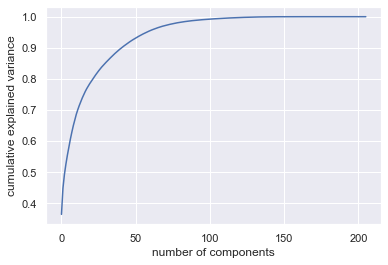

In [47]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

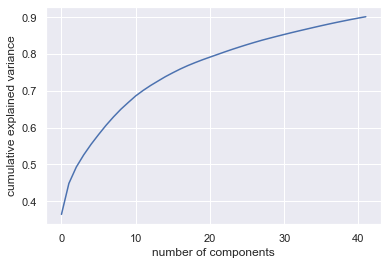

In [48]:
pca = PCA(42).fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [49]:
pca42 = PCA(4)
k_means = KMeans(n_clusters = 2)
k_means.fit(X)
y_hat = k_means.predict(X)

In [50]:
import pandas as pd
import pylab as pl
from sklearn import datasets
from sklearn.decomposition import PCA

In [51]:
# Dump components relations with features:
pca = PCA(n_components=4)
pca.fit_transform(X)
print (pd.DataFrame(pca.components_,columns=X.columns))

   number_of_trips_taken  qtemphigh  qtemplow  qprecipitation  qday_Friday  \
0               0.006144  -0.261954 -0.263091        0.258419    -0.001302   
1               0.404582  -0.007490 -0.003366       -0.003631    -0.002710   
2               0.060173   0.025720  0.032766       -0.042423    -0.036902   
3               0.093451  -0.053590 -0.051730        0.054965    -0.009189   

   qday_Monday  qday_Saturday  qday_Sunday  qday_Thursday  qday_Tuesday  \
0    -0.001963      -0.003738     0.008999       0.002887     -0.002818   
1     0.004714       0.004793    -0.005405      -0.004346      0.000269   
2    -0.013891       0.011214     0.027246      -0.007510      0.017407   
3     0.018181      -0.003155    -0.002238       0.002177     -0.001959   

   qday_Wednesday  qday1typical_Not at all typical  \
0       -0.002064                        -0.003500   
1        0.002685                        -0.003253   
2        0.002436                        -0.001666   
3       -0.003817

In [52]:
model = PCA(n_components=4).fit(X)
X_pc = model.transform(X)

In [53]:
#This doesn't work
# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = ['a','b','c','d', 'e']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

IndexError: list index out of range

In [98]:
# #plot centroids
# plt.scatter(X[:, 0], X[:, 1], c = y_hat, s = 25)
# cl_centers = k_means.cluster_centers_
# plt.scatter(cl_centers)

In [54]:
pca.n_components = 2
X_reduced = pca.fit_transform(X_scaled)
df_X_reduced = pd.DataFrame(X_reduced, index=df.index)

NameError: name 'X_scaled' is not defined

In [55]:
# Let the number of clusters be a parameter, so we can get a feel for an appropriate
# value thereof.
def cluster(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_reduced)
    Z = kmeans.predict(X_reduced)
    return kmeans, Z

In [56]:
max_clusters = len(X)
# n_clusters = max_clusters would be trivial clustering.

In [57]:
inertias = np.zeros(max_clusters)

for i in xrange(1, max_clusters):
    kmeans, Z = cluster(i)
    inertias[i] = kmeans.inertia_

NameError: name 'xrange' is not defined

# Principal component analysis loadings

Factor loadings (factor or component coefficients) : The factor loadings, also called component loadings in PCA, are the correlation coefficients between the variables (rows) and factors (columns). Analogous to Pearson's r, the squared factor loading is the percent of variance in that variable explained by the factor.

https://plot.ly/python/v3/ipython-notebooks/principal-component-analysis/

In [4]:
#read dummy df
X = pd.read_csv('scaled_dummy_reduced_df.csv', index_col=0)

In [ ]:
X = X.drop(columns = ["trip_id", "uniqueid"], axis=1)

In [5]:
X.head()

number_of_trips_taken  qtemphigh  qtemplow  qprecipitation  qday_Friday  \
0              -0.334052   0.468198  0.285697       -0.525553            0   
1              -0.334052  -0.094033 -0.117786       -0.096172            0   
2              -0.334052  -0.094033 -0.117786       -0.096172            0   
3               0.135854   0.208707  0.228056       -0.525553            0   
4               0.135854   0.208707  0.228056       -0.525553            0   

   qday_Monday  qday_Saturday  qday_Sunday  qday_Thursday  qday_Tuesday  \
0            0              0            1              0             0   
1            0              1            0              0             0   
2            0              1            0              0             0   
3            0              0            0              1             0   
4            0              0            0              1             0   

   qday_Wednesday  qday1typical_Not at all typical  \
0               0                                0   
1               0                                0   
2               0                                0   
3               0                                0   
4               0                                0   

   qday1typical_Not very typical  qday1typical_Somewhat typical  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   qday1typical_Very typical  qborough_home_Brooklyn  qborough_home_Manhattan  \
0                          1                       0                        0   
1                          1                       0                        0   
2                          1                       0                        0   
3                          1                       0                        0   
4                          1                       0                        0   

   qborough_home_Queens  qborough_home_Staten Island  qborough_home_The Bronx  \
0                     1                            0                        0   
1                     1                            0                        0   
2                     1                            0                        0   
3                     1                            0                        0   
4                     1                            0                        0   

   qsurveyzone_home_Inner Brooklyn  qsurveyzone_home_Inner Queens  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   qsurveyzone_home_Manhattan Core  qsurveyzone_home_Middle Queens  \
0                                0                               1   
1                                0                               1   
2                                0                               1   
3                                0                               1   
4                                0                               1   

   qsurveyzone_home_Northern Bronx  qsurveyzone_home_Northern Manhattan  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   qsurveyzone_home_Outer Brooklyn  qsurveyzone_home_Outer Queens  \
0                        

In [6]:
#Compute eigenvectors and eigenvalues
import numpy as np
mean_vec = np.mean(X, axis=0)
cov_mat = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
#Next, we perform an eigendecomposition on the covariance matrix:
#this is also a correlation matrix, since df was normalized before calculating covariance
cov_mat = np.cov(X.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 1.76074540e-02+0.j  9.34619612e-01+0.j -3.02636613e-02+0.j ...
  -6.74506908e-17+0.j  9.95841816e-17+0.j -7.24223929e-17+0.j]
 [-5.76282447e-01+0.j  5.15863155e-03+0.j -8.11226959e-03+0.j ...
  -1.56515963e-16+0.j  2.97612312e-16+0.j -1.47184813e-16+0.j]
 [-5.76155406e-01+0.j  1.16296661e-02+0.j -1.89704998e-02+0.j ...
   1.67113195e-16+0.j -3.34027949e-16+0.j  1.73728420e-16+0.j]
 ...
 [-3.36383682e-03+0.j -1.54548979e-03+0.j  4.37136852e-03+0.j ...
   2.60925369e-14+0.j -2.52147970e-14+0.j  3.00139621e-14+0.j]
 [ 9.78990217e-03+0.j  1.39415523e-03+0.j -9.41447487e-03+0.j ...
   2.61719587e-14+0.j -2.52527360e-14+0.j  3.00187510e-14+0.j]
 [ 2.74692079e-03+0.j  3.18285016e-02+0.j  9.90596703e-03+0.j ...
   2.60630468e-14+0.j -2.51892954e-14+0.j  2.99747882e-14+0.j]]

Eigenvalues 
[ 2.92846217e+00+0.00000000e+00j  1.05934694e+00+0.00000000e+00j
  1.03792959e+00+0.00000000e+00j  9.99728076e-01+0.00000000e+00j
  7.92301840e-01+0.00000000e+00j  6.88060613e-01+0.00000000e+0

In [14]:
#try correlation matrix instead
cor_mat1 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-5.24305413e-03+0.00000000e+00j  9.60317722e-04+0.00000000e+00j
  -5.27568621e-03+0.00000000e+00j ... -1.50951536e-16+5.40722174e-18j
  -1.50951536e-16-5.40722174e-18j  1.37287670e-16+0.00000000e+00j]
 [-1.24890157e-02+0.00000000e+00j -3.36701041e-02+0.00000000e+00j
   1.37452822e-02+0.00000000e+00j ...  7.08981319e-16+3.64913481e-16j
   7.08981319e-16-3.64913481e-16j -1.53412154e-16+0.00000000e+00j]
 [-9.98152606e-03+0.00000000e+00j -3.31895598e-02+0.00000000e+00j
   1.48951980e-02+0.00000000e+00j ... -4.17726209e-16-5.00386699e-16j
  -4.17726209e-16+5.00386699e-16j -1.31934602e-16+0.00000000e+00j]
 ...
 [-1.13106078e-02+0.00000000e+00j -6.79958756e-03+0.00000000e+00j
   1.16442443e-02+0.00000000e+00j ...  3.99705405e-15-5.16140110e-15j
   3.99705405e-15+5.16140110e-15j  2.68906361e-15+0.00000000e+00j]
 [ 1.35354522e-03+0.00000000e+00j  2.19629508e-02+0.00000000e+00j
   2.58825464e-02+0.00000000e+00j ...  6.09048695e-15-8.89209731e-15j
   6.09048695e-15+8.89209731e-15j

In [15]:
#Eigendecomposition of the raw data based on the correlation matrix:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-5.24305413e-03+0.00000000e+00j  9.60317722e-04+0.00000000e+00j
  -5.27568621e-03+0.00000000e+00j ... -1.50951536e-16+5.40722174e-18j
  -1.50951536e-16-5.40722174e-18j  1.37287670e-16+0.00000000e+00j]
 [-1.24890157e-02+0.00000000e+00j -3.36701041e-02+0.00000000e+00j
   1.37452822e-02+0.00000000e+00j ...  7.08981319e-16+3.64913481e-16j
   7.08981319e-16-3.64913481e-16j -1.53412154e-16+0.00000000e+00j]
 [-9.98152606e-03+0.00000000e+00j -3.31895598e-02+0.00000000e+00j
   1.48951980e-02+0.00000000e+00j ... -4.17726209e-16-5.00386699e-16j
  -4.17726209e-16+5.00386699e-16j -1.31934602e-16+0.00000000e+00j]
 ...
 [-1.13106078e-02+0.00000000e+00j -6.79958756e-03+0.00000000e+00j
   1.16442443e-02+0.00000000e+00j ...  3.99705405e-15-5.16140110e-15j
   3.99705405e-15+5.16140110e-15j  2.68906361e-15+0.00000000e+00j]
 [ 1.35354522e-03+0.00000000e+00j  2.19629508e-02+0.00000000e+00j
   2.58825464e-02+0.00000000e+00j ...  6.09048695e-15-8.89209731e-15j
   6.09048695e-15+8.89209731e-15j

In [16]:
#perform SVD to improve computational efficiency
u,s,v = np.linalg.svd(X.T)
u

array([[ 3.19447603e-04,  1.76229038e-02, -9.34614417e-01, ...,
        -1.29314246e-16,  2.46885199e-17,  2.38524478e-17],
       [ 6.15065888e-04, -5.76283833e-01, -5.15671101e-03, ...,
        -2.72898659e-15,  4.88083125e-16,  6.08566317e-16],
       [ 4.80558474e-04, -5.76159633e-01, -1.16247623e-02, ...,
         2.60290881e-15, -3.91477732e-16, -4.06997243e-16],
       ...,
       [-1.04885922e-02, -3.39728967e-03,  1.54454224e-03, ...,
         3.33066907e-16,  7.45931095e-17,  3.12250226e-17],
       [-3.63195283e-02,  9.66719737e-03, -1.39106893e-03, ...,
         1.14491749e-16, -5.37764278e-17,  1.00613962e-16],
       [-3.78629419e-02,  2.61206747e-03, -3.18284600e-02, ...,
         3.05311332e-16, -9.71445147e-17,  1.11022302e-16]])

In [17]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

AssertionError: 
Arrays are not almost equal to 6 decimals

Mismatch: 100%
Max absolute difference: 0.01768285
Max relative difference: 0.01800116
 x: array(1.)
 y: array(0.982317)

In [18]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [ ]:
#i have this already but i want a list of the principal componentsb

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,5)],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,5)], 
    y=cum_var_exp,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='selecting-principal-components')

# Identifying Principal Components

https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21

These principal components are calculated only from features and no information from classes are considered. So PCA is unsupervised method and it’s difficult to interpret the two axes as they are some complex mixture of the original features. We can make a heat-plot to see how the features mixed up to create the components.

In [34]:
import numpy as np
import matplotlib.pyplot as plt 
# from matplotlib.pyplot import matplotlib

In [43]:
pca=PCA(n_components=4) 
pca.fit(X) 
X_pca=pca.transform(X)

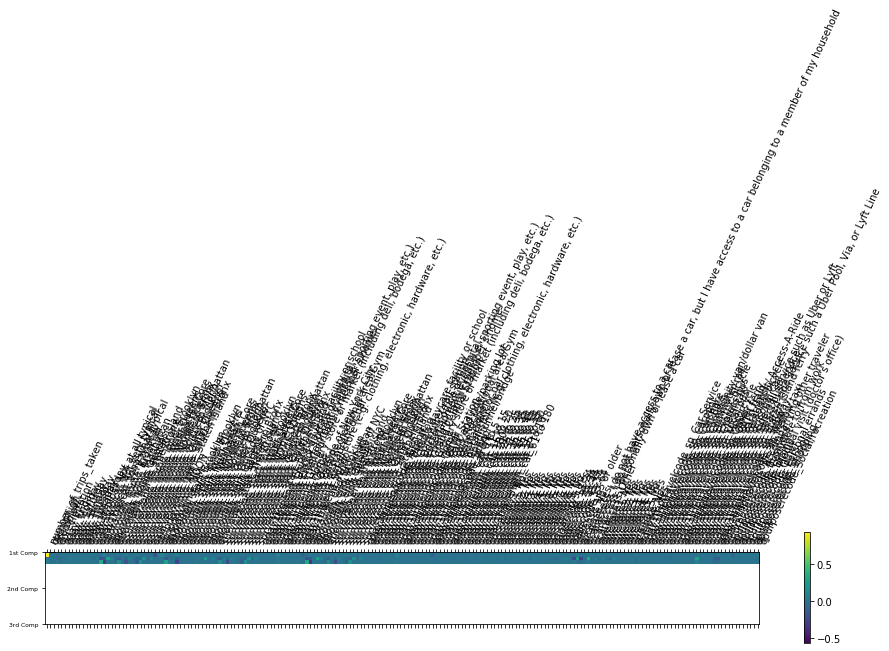

In [44]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,10,20],['1st Comp','2nd Comp','3rd Comp'],fontsize=6)
plt.colorbar()
plt.xticks(range(len(X.columns)),X.columns,rotation=65,ha='left')
#plt.tight_layout()
plt.show()# 

# T-SNE

https://www.kaggle.com/minc33/visualizing-high-dimensional-clusters/notebook

https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1

t-SNE differs from PCA by preserving only small pairwise distances or local similarities whereas PCA is concerned with preserving large pairwise distances to maximize variance.

 The t-SNE algorithm calculates a similarity measure between pairs of instances in the high dimensional space and in the low dimensional space. It then tries to optimize these two similarity measures using a cost function.
 
 tSNE is NN based. doesn't preserve similarities well.

In [45]:
#Initialize model
kmeans = KMeans(n_clusters=11)

In [46]:
#fit model
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=11, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
#Find which cluster each data-point belongs to
clusters = kmeans.predict(X)

In [48]:
#add cluster vector to X df
X["Cluster"] = clusters

In [49]:


#plotX will hold the values we wish to plot
plotX = pd.DataFrame(X)
plotX.columns = X.columns

In [50]:
#Set our perplexity (usually between 30 and 50)
perplexity = 50

In [51]:
#T-SNE with one dimension
tsne_1d = TSNE(n_components=1, perplexity=perplexity)

#T-SNE with two dimensions
tsne_2d = TSNE(n_components=2, perplexity=perplexity)

#T-SNE with three dimensions
tsne_3d = TSNE(n_components=3, perplexity=perplexity)

In [52]:
#This DataFrame holds a single dimension,built by T-SNE
TCs_1d = pd.DataFrame(tsne_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))

In [53]:
#This DataFrame contains two dimensions, built by T-SNE
TCs_2d = pd.DataFrame(tsne_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))


In [54]:
#And this DataFrame contains three dimensions, built by T-SNE
TCs_3d = pd.DataFrame(tsne_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

In [84]:
# TCs_1d.columns = ["TC1_1d"]

#PCs_1d.columns = ["PC1_1d"]

#"TC1_2d" means: 'The first component of the components created for 2-D visualization, by T-SNE.'
#And "TC2_2d" means: 'The second component of the components created for 2-D visualization, by T-SNE.'
TCs_2d.columns = ["TC1_2d","TC2_2d"]

# TCs_3d.columns = ["TC1_3d","TC2_3d","TC3_3d"]

In [85]:
TCs_2d.head()

TC1_2d     TC2_2d
0  17.589766  38.059902
1   2.499322  33.827602
2  -0.837839  34.050999
3  -0.037958  33.557434
4   0.569664  33.481003

In [87]:
plotX = pd.concat([plotX,TCs_1d,TCs_2d,TCs_3d], axis=1, join='inner')

In [88]:
plotX["dummy"] = 0

In [91]:
cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
cluster2 = plotX[plotX["Cluster"] == 2]
cluster3 = plotX[plotX["Cluster"] == 3]
cluster4 = plotX[plotX["Cluster"] == 4]
cluster5 = plotX[plotX["Cluster"] == 5]
cluster6 = plotX[plotX["Cluster"] == 6]
cluster7 = plotX[plotX["Cluster"] == 7]
cluster8 = plotX[plotX["Cluster"] == 8]
cluster9 = plotX[plotX["Cluster"] == 9]
cluster10 = plotX[plotX["Cluster"] == 10]

In [61]:
# #Instructions for building the 1-D plot

# #trace1 is for 'Cluster 0'
# trace1 = go.Scatter(
#                     x = cluster0["TC1_1d"],
#                     y = cluster0["dummy"],
#                     mode = "markers",
#                     name = "Cluster 0",
#                     marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
#                     text = None)

# #trace2 is for 'Cluster 1'
# trace2 = go.Scatter(
#                     x = cluster1["TC1_1d"],
#                     y = cluster1["dummy"],
#                     mode = "markers",
#                     name = "Cluster 1",
#                     marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
#                     text = None)

# #trace3 is for 'Cluster 2'
# trace3 = go.Scatter(
#                     x = cluster2["TC1_1d"],
#                     y = cluster2["dummy"],
#                     mode = "markers",
#                     name = "Cluster 2",
#                     marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
#                     text = None)

# data = [trace1, trace2, trace3]

# title = "Visualizing Clusters in One Dimension Using T-SNE (perplexity=" + str(perplexity) + ")"

# layout = dict(title = title,
#               xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
#               yaxis= dict(title= '',ticklen= 5,zeroline= False)
#              )

# fig = dict(data = data, layout = layout)

# iplot(fig)

In [95]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_2d"],
                    y = cluster0["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_2d"],
                    y = cluster1["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["TC1_2d"],
                    y = cluster2["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(200, 128, 100, 0.8)'),
                    text = None)


#trace4 is for 'Cluster 3'
trace4 = go.Scatter(
                    x = cluster3["TC1_2d"],
                    y = cluster3["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(200, 255, 50, 0.8)'),
                    text = None)

#trace5 is for 'Cluster 4'
trace5 = go.Scatter(
                    x = cluster4["TC1_2d"],
                    y = cluster4["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'rgba(100, 255, 75, 0.8)'),
                    text = None)

#trace6 is for 'Cluster 5'
trace6 = go.Scatter(
                    x = cluster5["TC1_2d"],
                    y = cluster5["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 5",
                    marker = dict(color = 'rgba(100, 255, 100, 0.8)'),
                    text = None)

#trace7 is for 'Cluster 6'
trace7 = go.Scatter(
                    x = cluster6["TC1_2d"],
                    y = cluster6["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 6",
                    marker = dict(color = 'rgba(50, 255, 125, 0.8)'),
                    text = None)

#trace8 is for 'Cluster 7'
trace8 = go.Scatter(
                    x = cluster7["TC1_2d"],
                    y = cluster7["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 7",
                    marker = dict(color = 'rgba(50, 255, 150, 0.8)'),
                    text = None)

#trace9 is for 'Cluster 8'
trace9 = go.Scatter(
                    x = cluster8["TC1_2d"],
                    y = cluster8["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 8",
                    marker = dict(color = 'rgba(255, 255, 10, 0.8)'),
                    text = None)
#trace10 is for 'Cluster 9'
trace10 = go.Scatter(
                    x = cluster9["TC1_2d"],
                    y = cluster9["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 9",
                    marker = dict(color = 'rgba(255, 180, 75, 0.8)'),
                    text = None)
#trace11 is for 'Cluster 10'
trace11 = go.Scatter(
                    x = cluster10["TC1_2d"],
                    y = cluster10["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 10",
                    marker = dict(color = 'rgba(200, 255, 100, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11]

title = "Visualizing Clusters in Two Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [63]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["TC1_3d"],
                    y = cluster0["TC2_3d"],
                    z = cluster0["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["TC1_3d"],
                    y = cluster1["TC2_3d"],
                    z = cluster1["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["TC1_3d"],
                    y = cluster2["TC2_3d"],
                    z = cluster2["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Three Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

# Learned Decision Boundary

https://github.com/learn-co-students/dsc-pca-in-scikitlearn-lab-nyc-ds-111819/tree/solution

In [67]:
#This DataFrame contains two dimensions, built by T-SNE
TCs_2d = pd.DataFrame(tsne_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))

df = pd.DataFrame(data = TCs_2d,
                 columns = ['PC1', 'PC2'])

In [66]:
# Plot decision boundary using principal components 
import numpy as np
def decision_boundary(pred_func):
    
    # Set the boundary
    x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
    y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5
    h = 0.01
    
    # Build meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour
    plt.figure(figsize=(15,10))
    plt.contourf(xx, yy, Z, cmap=plt.cm.afmhot)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Spectral, marker='x')

decision_boundary(lambda x: TCs_2d.predict(x))

plt.title('decision boundary');

AttributeError: 'DataFrame' object has no attribute 'predict'